In [1]:
# Pruebas para la media movil python

In [13]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

r = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=TU10HCWDTV5CNVBN")

data = r.json()
print(type(data))

dicto = []

for valor in data["Time Series (Daily)"]:
	#print(data["Time Series (Daily)"][valor]["1. open"])
	d = data["Time Series (Daily)"][valor]
	dicto.append(d)

print(type(dicto))


df= pd.DataFrame(dicto)
df.head()


<class 'dict'>
<class 'list'>


,1. open,2. high,3. low,4. close,5. volume
0,224.7900,225.8400,224.0200,225.7400,22929364
1,223.8200,226.4400,223.5400,224.9500,30181227
2,221.0000,223.7500,219.7600,220.4200,23984706
3,219.7500,222.8200,219.7000,222.1900,24554379
4,216.8200,221.2600,216.6300,220.7900,27693358


In [23]:
df.dropna(inplace=True)
df['6-month-SMA']=df['4. close'].rolling(window=6).mean()
df['12-month-SMA']=df['4. close'].rolling(window=12).mean()

In [24]:
df.tail()

,1. open,2. high,3. low,4. close,5. volume,6-month-SMA,12-month-SMA
95,186.1253,186.4143,184.4512,185.7865,23695159,186.462450,186.848600
96,188.3475,188.8657,187.2015,187.4905,20778772,186.626867,186.954892
97,188.8258,189.3938,186.7929,187.9289,26212221,186.786300,187.045400
98,186.3606,188.9712,186.2712,188.6437,27989289,187.284100,187.162258
99,185.1793,186.0231,183.8591,185.9833,23211241,187.225550,187.000950


In [21]:
df['4. close'].head()

5    217.6600
6    220.0300
7    218.3700
8    218.2400
9    217.8800
Name: 4. close, dtype: object

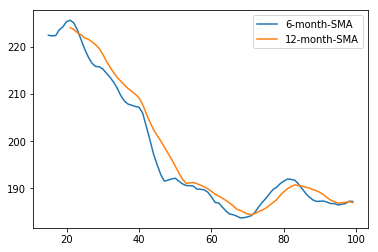

In [25]:
df.plot()